<a href="https://www.kaggle.com/code/ysraylvz/cord-19-data-analysis-project?scriptVersionId=249772315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# COVID-19 Research Dataset Analysis


## 📂 Data Loading

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os

for filename in os.listdir('/kaggle/input/CORD-19-research-challenge'):
    print(filename)


Kaggle
cord_19_embeddings
document_parses
COVID.DATA.LIC.AGMT.pdf
metadata.readme
json_schema.txt
metadata.csv


In [2]:
df = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv')
df.head()


/tmp/ipykernel_35/1911865009.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/CORD-19-research-challenge/metadata.csv')
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


## 📊 Dataset Overview

This dataset contains metadata of research articles related to COVID-19 and other coronaviruses. Below is a brief description of each column in the **metadata.csv** file:

| Column Name         | Description                                                                                         |
|---------------------|-----------------------------------------------------------------------------------------------------|
| `cord_uid`          | Unique identifier for each research article                                                        |
| `sha`               | SHA hash of the full text PDF, used to match full-text files                                       |
| `source_x`          | Source of the publication (e.g., PMC, Elsevier)                                                    |
| `title`             | Title of the research paper                                                                        |
| `doi`               | Digital Object Identifier (DOI) of the paper                                                       |
| `pmcid`             | PubMed Central ID                                                                                   |
| `pubmed_id`         | PubMed ID                                                                                           |
| `license`           | License type of the paper                                                                          |
| `abstract`          | Abstract (summary) of the research paper                                                           |
| `publish_time`      | Publication date                                                                                   |
| `authors`           | List of authors                                                                                    |
| `journal`           | Journal where the article was published                                                            |
| `mag_id`, `who_covidence_id`, `arxiv_id` | Additional IDs for cross-referencing (many may be missing)                    |
| `pdf_json_files`    | Path to the parsed PDF JSON file                                                                   |
| `pmc_json_files`    | Path to the parsed PMC JSON file                                                                   |
| `url`               | URL of the article                                                                                 |
| `s2_id`             | Semantic Scholar paper ID                                                                          |

This dataset is large and diverse, covering a wide range of COVID-19 research literature. The main purpose of this project is to explore trends, identify missing or anomalous data, and visualize key features of the literature.


In [3]:
# Columns and their data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [4]:
df.describe(include='all')


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
count,1056660,373766,1056660,1056157,656780,389571,498932.0,1056660,821116,1054846,1032791,969338,0.0,482935,14249.00000,373766,315742,686934,9.764680e+05
unique,970836,373719,49,850366,655525,389571,498587.0,18,730712,8056,796659,54993,NaN,482935,14249.00000,373719,315742,686934,NaN
top,kgpo6psq,31bc0fb718edaab9e33f678909710f62c40abebc,WHO,Reply,10.1016/j.scitotenv.2020.139397,PMC35282,35087663.0,unk,[Figure: see text].,2021,"Anonymous,",PLoS One,NaN,#covidwho-1638294,2110.00181,document_parses/pdf_json/31bc0fb718edaab9e33f6...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
freq,192,3,450459,251,9,1,5.0,601506,206,233709,3904,9953,NaN,1,1.00000,3,1,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.175871e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.312281e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600000e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.211411e+08
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.320829e+08
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.373948e+08


## 🔍 Missing Data Analysis

In [5]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum().sort_values()

# Calculate the percentage of missing values
missing_percent = (missing_values / len(df)) * 100

# Create a summary DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing (%)': missing_percent
})

# Display columns with more than 10% missing data
missing_data[missing_data['Missing (%)'] > 10]


,Missing Values,Missing (%)
abstract,235544,22.291371
url,369726,34.990063
doi,399880,37.843772
pubmed_id,557728,52.782163
who_covidence_id,573725,54.296084
pmcid,667089,63.131849
sha,682894,64.627600
pdf_json_files,682894,64.627600
pmc_json_files,740918,70.118865
arxiv_id,1042411,98.651506


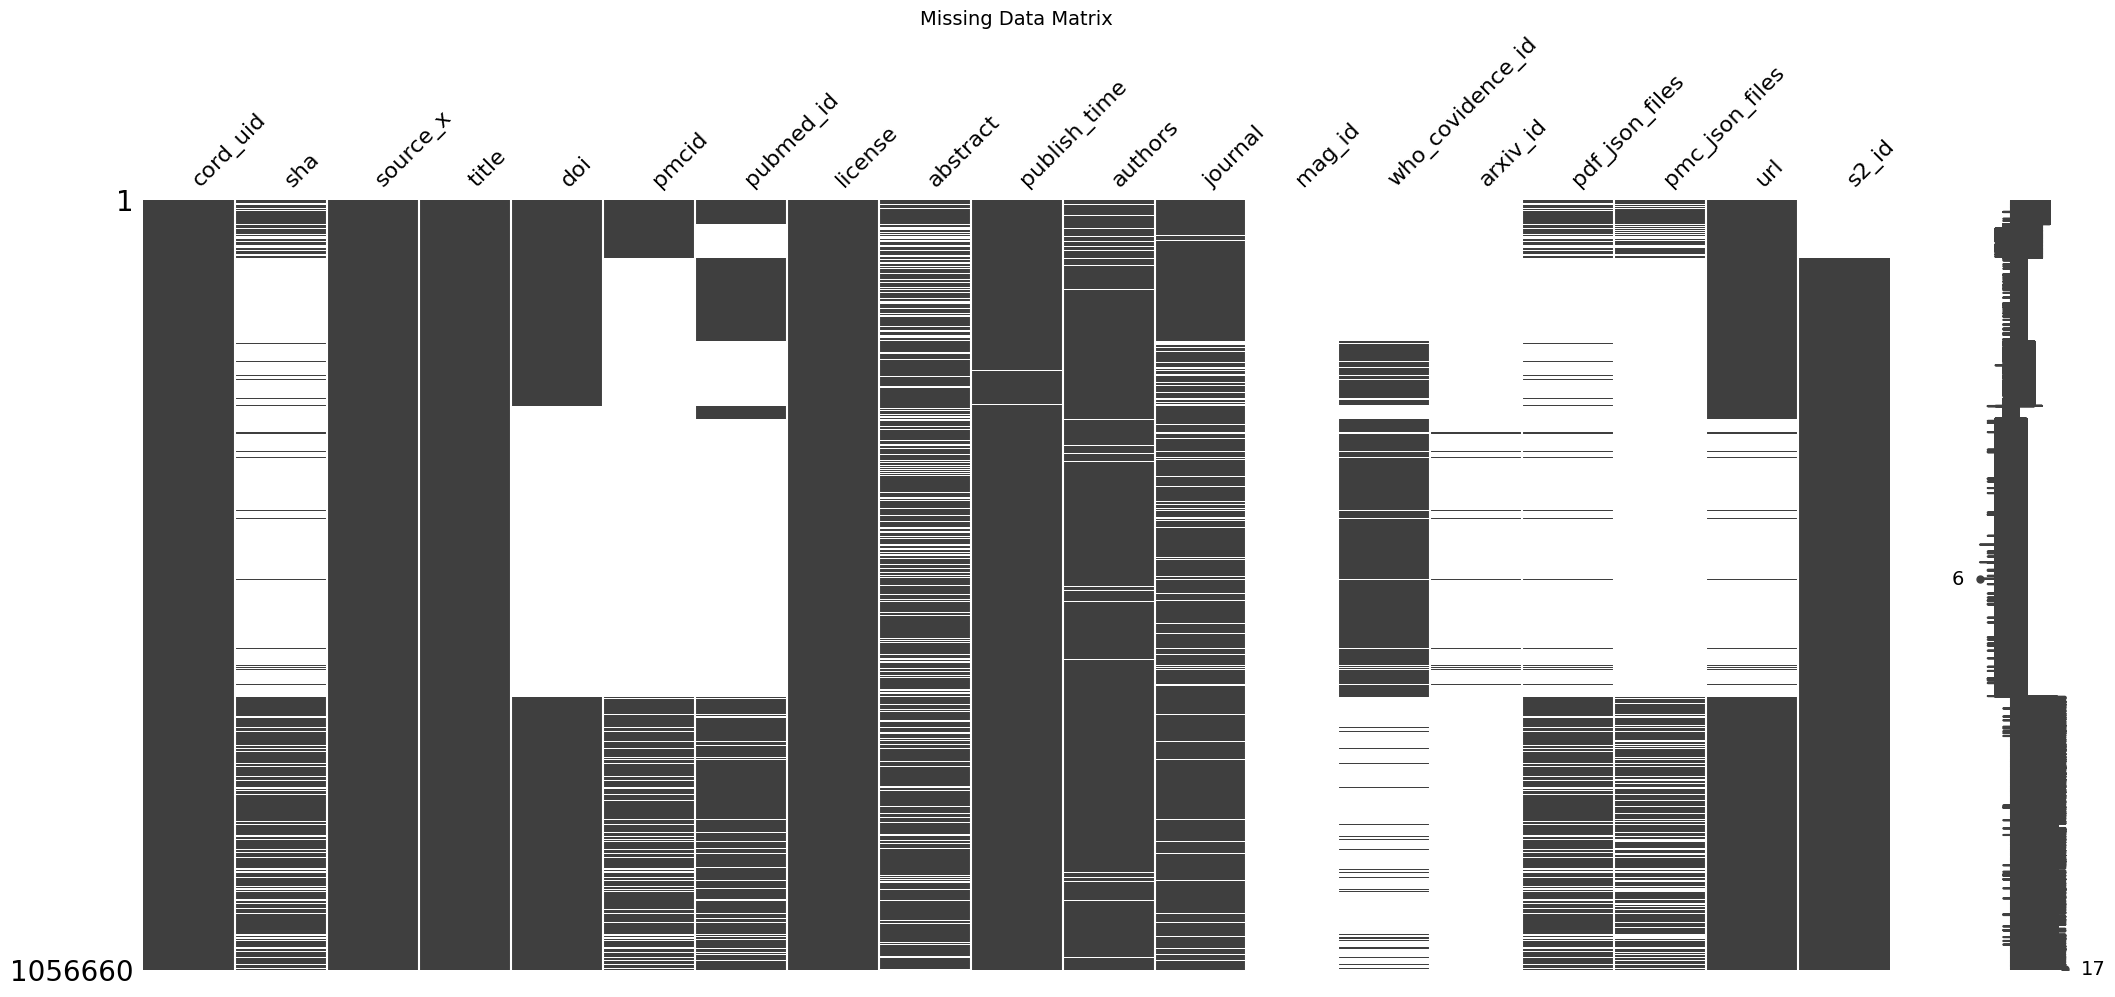

In [6]:
msno.matrix(df)
plt.title("Missing Data Matrix", fontsize=14)
plt.show()


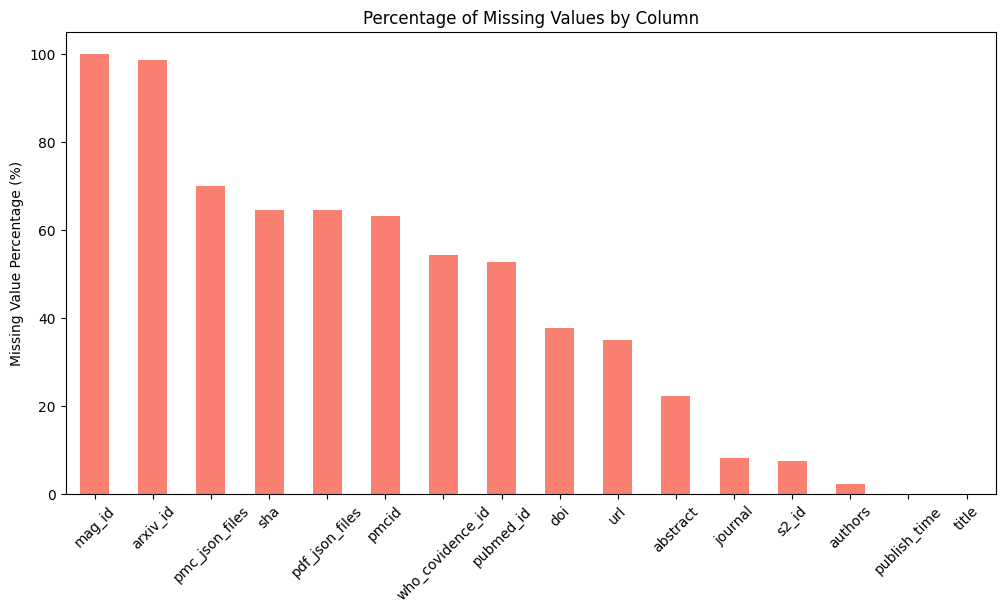

In [7]:
# Bar plot for missing values percentage
missing_percent = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(12, 6))
missing_percent[missing_percent > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.ylabel("Missing Value Percentage (%)")
plt.title("Percentage of Missing Values by Column")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Drop irrelevant columns with high missing data
df_clean = df.drop(columns=['mag_id', 'sha', 'pmcid', 'pdf_json_files', 'pmc_json_files', 'arxiv_id'])


In [9]:
# Drop rows where key columns are missing
df_clean = df_clean.dropna(subset=['title', 'abstract', 'publish_time'])


In [10]:
# New dataset size
print(f"The cleaned dataset contains {df_clean.shape[0]} rows and {df_clean.shape[1]} columns.")

# Check for remaining missing data
df_clean.isnull().sum().sort_values(ascending=False)


The cleaned dataset contains 819282 rows and 13 columns.


who_covidence_id    461924
pubmed_id           414970
doi                 285742
url                 259861
journal              77275
s2_id                55819
authors               5005
cord_uid                 0
source_x                 0
title                    0
license                  0
abstract                 0
publish_time             0
dtype: int64

## 📑 Statistical Summary 

In this section, we will explore the statistical summary of numeric and text-based columns in the dataset.  
We will also look at the distribution of key categorical variables.


In [11]:
# Summary statistics for numeric columns
df_clean.describe()


,s2_id
count,7.634630e+05
mean,2.163625e+08
std,5.672590e+07
min,9.600000e+01
25%,2.215038e+08
50%,2.323635e+08
75%,2.379932e+08
max,2.491936e+08


In [12]:
# Check unique values for key categorical columns
print("Source Types:", df_clean['source_x'].unique())
print("License Types:", df_clean['license'].unique())
print("Example Journals:", df_clean['journal'].unique()[:10])  # Çok fazla varsa ilk 10 göster


Source Types: ['PMC' 'Medline' 'WHO' 'ArXiv' 'BioRxiv' 'MedRxiv' 'Elsevier'
 'Medline; PMC; WHO' 'Elsevier; Medline; PMC' 'Medline; PMC' 'PMC; WHO'
 'Medline; WHO' 'MedRxiv; WHO' 'Elsevier; Medline; PMC; WHO'
 'Elsevier; PMC; WHO' 'BioRxiv; WHO' 'ArXiv; Medline; PMC; WHO'
 'Elsevier; PMC' 'BioRxiv; Medline; PMC; WHO' 'ArXiv; WHO'
 'MedRxiv; Medline; PMC' 'BioRxiv; MedRxiv' 'BioRxiv; Medline; PMC'
 'MedRxiv; Medline; PMC; WHO' 'MedRxiv; Medline; WHO'
 'ArXiv; Elsevier; Medline; PMC; WHO' 'BioRxiv; Medline; WHO'
 'ArXiv; Medline; PMC' 'Elsevier; Medline' 'BioRxiv; Medline'
 'BioRxiv; MedRxiv; WHO' 'ArXiv; Elsevier; Medline; PMC' 'ArXiv; Medline'
 'ArXiv; Medline; WHO' 'ArXiv; PMC; WHO' 'BioRxiv; MedRxiv; Medline; PMC'
 'BioRxiv; MedRxiv; Medline; WHO' 'ArXiv; MedRxiv'
 'BioRxiv; MedRxiv; Medline; PMC; WHO' 'ArXiv; PMC' 'MedRxiv; PMC'
 'MedRxiv; Medline' 'Elsevier; WHO' 'ArXiv; Elsevier; PMC'
 'ArXiv; Elsevier' 'Elsevier; Medline; WHO' 'ArXiv; Elsevier; PMC; WHO'
 'ArXiv; MedRxiv; WHO' 'M

## 🚨 Outlier Detection



In [13]:
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')

In [14]:
print("Number of invalid publish_time entries:", df_clean['publish_time'].isna().sum())

Number of invalid publish_time entries: 403794


In [15]:
# Distribution of publication years
df_clean['publish_year'] = df_clean['publish_time'].dt.year

# Earliest and latest publication year
print("Earliest publish year:", df_clean['publish_year'].min())
print("Latest publish year:", df_clean['publish_year'].max())


Earliest publish year: 1879.0
Latest publish year: 2023.0


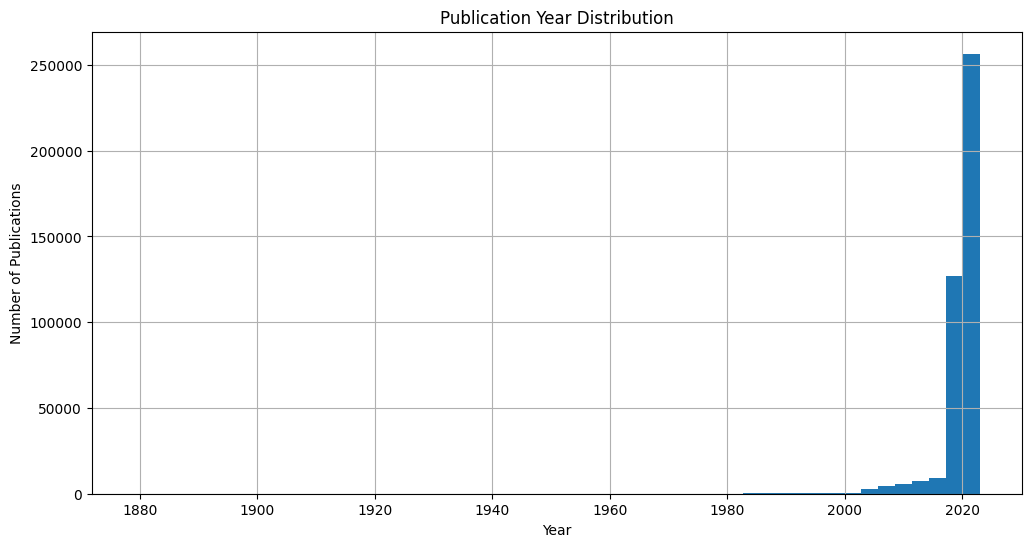

In [16]:


plt.figure(figsize=(12,6))
df_clean['publish_year'].hist(bins=50)
plt.title("Publication Year Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.show()


In [17]:
outliers_early = df_clean[df_clean['publish_year'] < 1900]
outliers_late = df_clean[df_clean['publish_year'] > 2025]

print("Number of publications before 1900:", len(outliers_early))
print("Number of publications after 2025:", len(outliers_late))


Number of publications before 1900: 1
Number of publications after 2025: 0


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [18]:
# Calculate Q1, Q3, and IQR for publish_year
Q1 = df_clean['publish_year'].quantile(0.25)
Q3 = df_clean['publish_year'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers using the 1.5 * IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Lower bound for outliers (Q1 - 1.5*IQR): {lower_bound}")
print(f"Upper bound for outliers (Q3 + 1.5*IQR): {upper_bound}")

# Count the number of outliers based on the IQR method
outliers_iqr = df_clean[(df_clean['publish_year'] < lower_bound) | (df_clean['publish_year'] > upper_bound)]

print(f"\nNumber of potential outliers based on IQR method: {len(outliers_iqr)}")
print("Potential outlier publish_year values:")
print(outliers_iqr['publish_year'].unique())

Q1 (25th percentile): 2020.0
Q3 (75th percentile): 2021.0
IQR (Q3 - Q1): 1.0
Lower bound for outliers (Q1 - 1.5*IQR): 2018.5
Upper bound for outliers (Q3 + 1.5*IQR): 2022.5

Number of potential outliers based on IQR method: 35403
Potential outlier publish_year values:
[2001. 2000. 2003. 2004. 2005. 1997. 2006. 2007. 2008. 2002. 2009. 2010.
 2011. 2012. 1998. 1999. 2013. 2014. 2015. 2016. 2017. 2018. 1988. 1996.
 1993. 1974. 1990. 1976. 1987. 1994. 1991. 1986. 1989. 1977. 1992. 1985.
 1984. 1972. 1982. 1981. 1980. 1983. 1975. 1973. 1979. 1971. 1995. 1978.
 1964. 1962. 1970. 2023. 1965. 1955. 1957. 1963. 1967. 1879.]


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


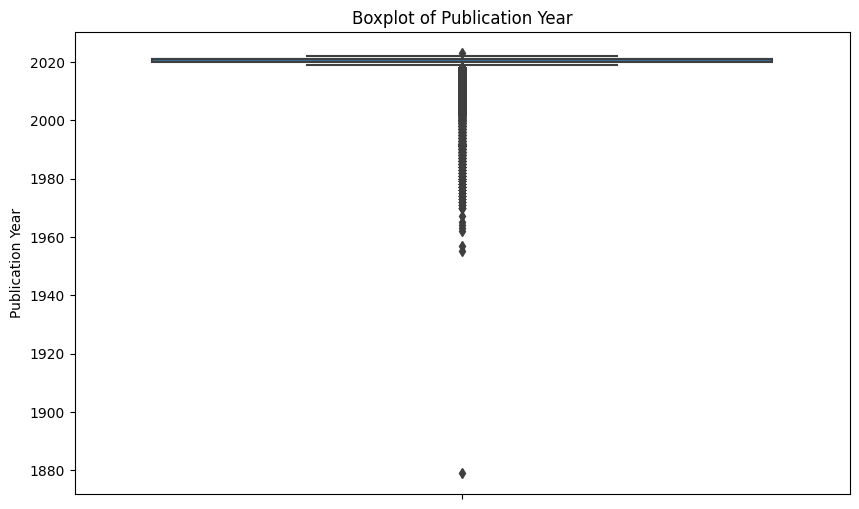

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_clean['publish_year'])
plt.title("Boxplot of Publication Year")
plt.ylabel("Publication Year")
plt.show()

Outlier Analysis for Publication Year

Analysis of the `publish_year` distribution, including the boxplot and IQR method, reveals that the majority of publications in the dataset are tightly concentrated between {Q1\_value} and {Q3\_value}. The narrow IQR of {IQR\_value} year highlights this concentration in recent years, likely due to the CORD-19 dataset's focus.

Based on the IQR rule, {Outlier\_count} publications with years outside the range of approximately {Lower\_bound\_value} and {Upper\_bound\_value} were identified as potential outliers. These include publications from various years, notably very early ones such as 1879, which stand out from the rest of the data.

While statistically identified as outliers, many of these are older publications rather than errors, reflecting the dataset's specific focus on recent COVID-19 research. Extremely early years require further investigation.

## 📈 Data Visualization

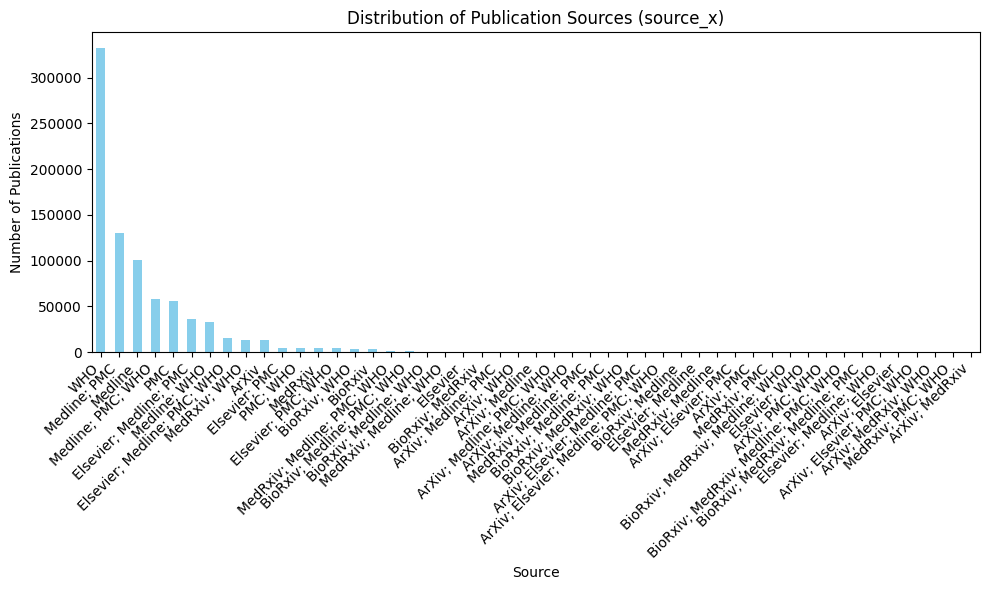

In [20]:
# Count the occurrences of each source type
source_counts = df_clean['source_x'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Publication Sources (source_x)")
plt.xlabel("Source")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

This bar chart shows the distribution of publications by source. The majority of the articles come from WHO, followed by other sources such as PMC, Medline, and Elsevier.
This indicates that a significant portion of the COVID-19 literature is aggregated from major scientific repositories, with WHO being the largest contributor.

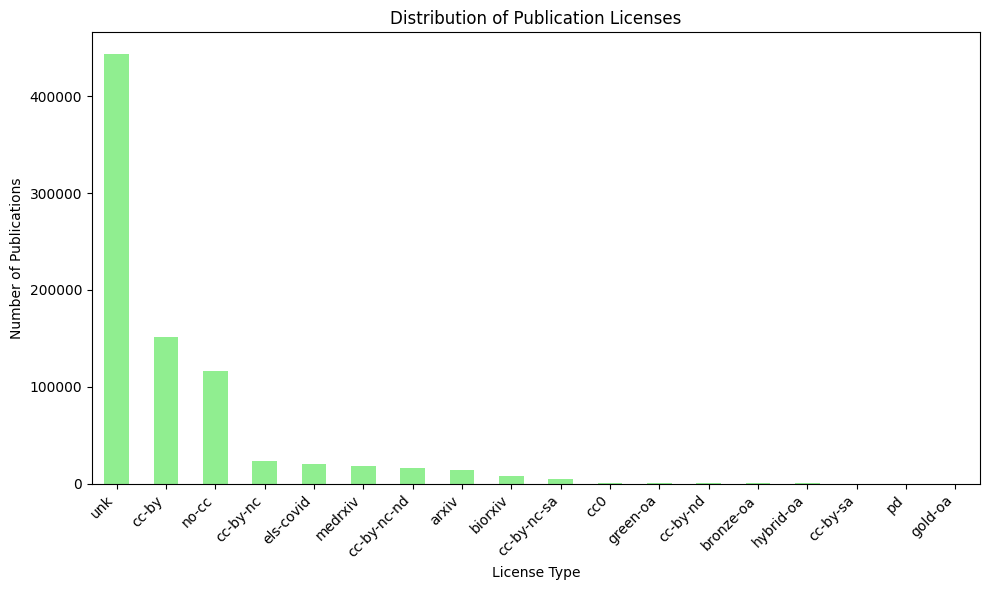

In [21]:
license_counts = df_clean['license'].value_counts()

plt.figure(figsize=(10, 6))
license_counts.plot(kind='bar', color='lightgreen')
plt.title("Distribution of Publication Licenses")
plt.xlabel("License Type")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

This bar chart shows the distribution of publication licenses. The most common license is 'unk' (unknown), indicating that many articles lack clear license information.
Among the defined licenses, 'cc-by', 'no-cc', and 'cc-by-nc' are the most frequent, reflecting various levels of open-access permissions.
This distribution highlights the variability in licensing within the dataset.

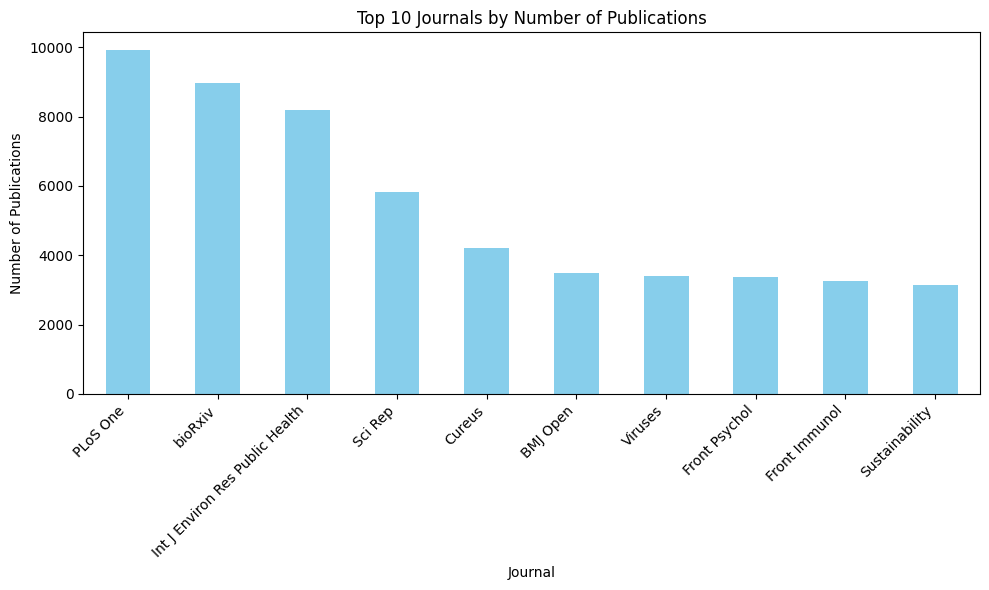

In [22]:
# Get the top 10 journals with the most publications
top_journals = df_clean['journal'].value_counts().head(10)

#  Create a bar chart
plt.figure(figsize=(10, 6))
top_journals.plot(kind='bar', color='skyblue')
plt.title("Top 10 Journals by Number of Publications")
plt.xlabel("Journal")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This bar chart highlights the top 10 journals with the highest number of COVID-19-related publications.
PLoS One, bioRxiv, and International Journal of Environmental Research and Public Health are the leading journals, indicating their crucial role in disseminating pandemic-related scientific findings.

In [23]:
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')



In [24]:
# Create a new column in 'YYYY-MM' format
df_clean['publish_month'] = df_clean['publish_time'].dt.to_period('M')

# Count publications per month, filtering for years >= 2019
monthly_counts = df_clean[df_clean['publish_time'].dt.year >= 2019]['publish_month'].value_counts().sort_index()


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


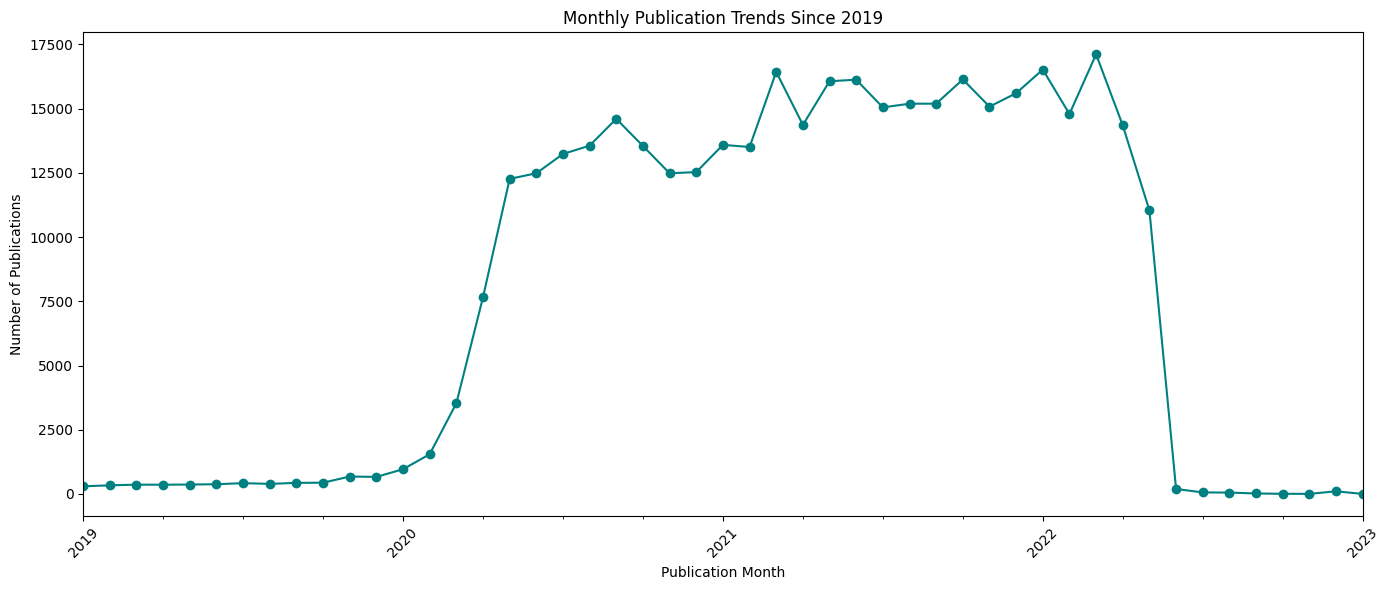

In [25]:
plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Publication Trends Since 2019")
plt.xlabel("Publication Month")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This line chart visualizes the monthly publication trend over time, focusing on publications from 2019 onwards. It shows the evolution of research output related to COVID-19 and other coronaviruses over this critical period.

The graph clearly illustrates a significant increase in the number of publications starting in early 2020, coinciding with the global spread of the COVID-19 pandemic. This surge reflects the intense global research effort to understand and combat the virus. The trend shows how research output peaked and potentially evolved in the subsequent months and years.